## Importing Libraries and Data

In [6]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [100]:
housing = pd.read_csv("train.csv")
school = pd.read_csv("ames_school_quality.csv")
income = pd.read_excel("income_unemp_data.xlsx")
walking = pd.read_excel("walking score.xlsx")

## Pre-processing

In [101]:
# concatenation
joined_df = housing.merge(school, how ="left", left_on='Neighborhood', right_on='neighborhood')
joined_df = joined_df.merge(income, how ="left", left_on='Neighborhood', right_on='neighborhood')
joined_df = joined_df.merge(walking, how ="left", left_on='Neighborhood', right_on='neighborhood')

In [107]:
# missing values
joined_df.isnull().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
Street                      0
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1

In [103]:
# removing duplicate columns and columns with high missing values
joined_df.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature',
                          'neighborhood_x','neighborhood_y','neighborhood','Unnamed: 1_y']
              , inplace = True)

In [104]:
joined_df.rename(columns={'Unnamed: 1_x':'NeighborhoodFull'}, inplace=True)

In [105]:
joined_df.dtypes

Id                            int64
MSSubClass                    int64
MSZoning                     object
LotFrontage                 float64
LotArea                       int64
Street                       object
LotShape                     object
LandContour                  object
Utilities                    object
LotConfig                    object
LandSlope                    object
Neighborhood                 object
Condition1                   object
Condition2                   object
BldgType                     object
HouseStyle                   object
OverallQual                   int64
OverallCond                   int64
YearBuilt                     int64
YearRemodAdd                  int64
RoofStyle                    object
RoofMatl                     object
Exterior1st                  object
Exterior2nd                  object
MasVnrType                   object
MasVnrArea                  float64
ExterQual                    object
ExterCond                   

In [106]:
# Imputing missing values
for col in joined_df:
    if joined_df[col].dtypes == 'object':
        joined_df[col].fillna(joined_df[col].mode()[0], inplace = True)
    else:
        joined_df[col].fillna(joined_df[col].mean(), inplace = True)

In [ ]:
# Creating dummies
joined_df_dummified = pd.get_dummies(joined_df)

### ML

In [122]:
X = joined_df_dummified.drop(columns = ['SalePrice'])
y = joined_df_dummified['SalePrice']

In [123]:
# GridSearchCV with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regr = RandomForestRegressor()
parameters = {'max_depth':[2, 3, 5]}

model = GridSearchCV(regr, parameters)
model.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

### Model Evaluation

In [125]:
print(model.cv_results_['mean_test_score'])
print(model.cv_results_['std_test_score'])

[0.66311867 0.75545358 0.83127683]
[0.00659205 0.01479623 0.01635838]


In [129]:
regr_dep5 = RandomForestRegressor(max_depth = 5)
regr_dep5.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Feature Importance

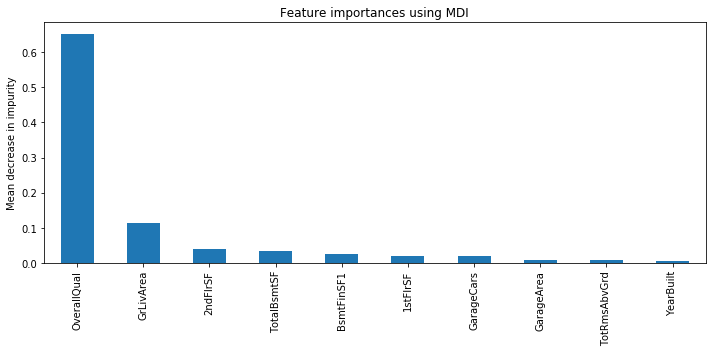

In [149]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(regr_dep5.feature_importances_, index=X.columns)
forest_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances[:10].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()